In [81]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [82]:
data = pd.read_csv("diabetes.csv")

In [83]:
data.sample(5)

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [84]:
data.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

In [85]:
X = data.drop("class",axis=1)
y=data['class']

In [86]:
scaler =StandardScaler()
X_scaled =scaler.fit_transform(X)

In [87]:
X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,stratify=y,test_size=0.10,random_state=42)

In [88]:
classifier = RandomForestClassifier(n_estimators=100)

classifier.fit(X_train,y_train)

RandomForestClassifier()

In [89]:
y_pred = classifier.predict(X_test)

In [90]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8051948051948052


In [91]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
1,plasma_concentration,0.265153
5,bmi,0.152950
7,age,0.142551
6,diabetes_pedigree,0.120932
2,diastolic_blood_pressure,0.083460
0,time_pregnant_no,0.082878
4,serum_insulin,0.078441
3,triceps_skinfold_thickness,0.073634


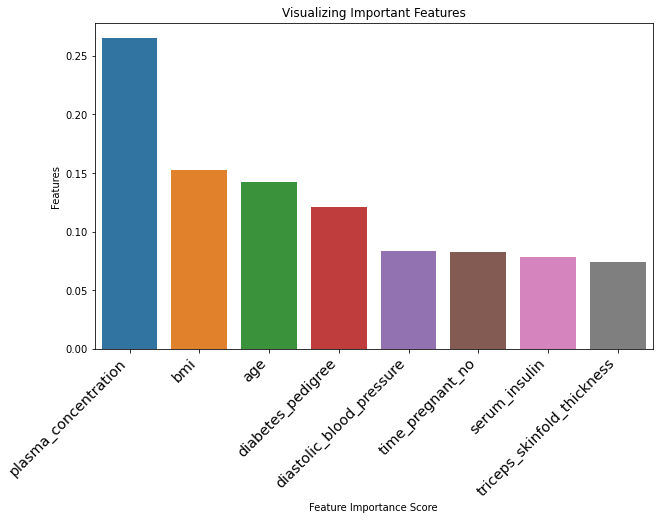

In [92]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [93]:
# load data with selected features
X = data.drop(["class", "triceps_skinfold_thickness"], axis=1)
y = data["class"]

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

In [94]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182
